# 🐼 Taller de Pandas: Análisis de Datos de Ventas

Bienvenido al taller interactivo de Pandas. En esta clase de 2 horas aprenderás a manipular, analizar y visualizar datos usando Python y Pandas.

---

## 🎯 Objetivos
- Explorar y limpiar datos con Pandas.
- Realizar análisis exploratorio de datos.
- Visualizar patrones y tendencias.
- Resolver desafíos en equipo.

---

## 📦 Dataset
Simularemos un conjunto de datos de ventas con las siguientes columnas:

- `Fecha`
- `Producto`
- `Categoría`
- `Región`
- `Cliente`
- `Cantidad`
- `Precio Unitario`
- `Total Venta`

¡Comencemos! 🚀


In [11]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Parámetros
productos = ['Refrigerador', 'Lavadora', 'Microondas', 'Licuadora', 'Plancha', 'Aspiradora']
categorias = {
    'Refrigerador': 'Línea Blanca',
    'Lavadora': 'Línea Blanca',
    'Microondas': 'Electrodomésticos',
    'Licuadora': 'Electrodomésticos',
    'Plancha': 'Electrodomésticos',
    'Aspiradora': 'Electrodomésticos'
}
regiones = ['Norte', 'Sur', 'Este', 'Oeste']
clientes = [f'Segundo_{i}' for i in range(1, 21)]

# Generar datos
np.random.seed(42)
fechas = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 364)) for _ in range(500)]
productos_sample = [random.choice(productos) for _ in range(500)]
categorias_sample = [categorias[p] for p in productos_sample]
regiones_sample = [random.choice(regiones) for _ in range(500)]
clientes_sample = [random.choice(clientes) for _ in range(500)]
cantidades = np.random.randint(1, 10, size=500)
precios_unitarios = [random.randint(100, 1000) for _ in range(500)]
total_venta = [c * p for c, p in zip(cantidades, precios_unitarios)]

# Crear DataFrame
df = pd.DataFrame({
    'Fecha': fechas,
    'Producto': productos_sample,
    'Categoría': categorias_sample,
    'Región': regiones_sample,
    'Cliente': clientes_sample,
    'Cantidad': cantidades,
    'Precio Unitario': precios_unitarios,
    'Total Venta': total_venta
})

df.head()


Fecha    Producto          Categoría Región     Cliente  Cantidad  \
0 2023-01-07  Aspiradora  Electrodomésticos  Oeste   Segundo_1         7   
1 2023-01-29     Plancha  Electrodomésticos  Oeste   Segundo_5         4   
2 2023-11-29   Licuadora  Electrodomésticos   Este  Segundo_16         8   
3 2023-06-12  Aspiradora  Electrodomésticos   Este   Segundo_7         5   
4 2023-07-29   Licuadora  Electrodomésticos    Sur  Segundo_18         7   

   Precio Unitario  Total Venta  
0              886         6202  
1              801         3204  
2              313         2504  
3              267         1335  
4              343         2401

## 🔍 Exploración Inicial

Veamos las primeras filas, tipos de datos y valores nulos.


In [12]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            500 non-null    datetime64[ns]
 1   Producto         500 non-null    object        
 2   Categoría        500 non-null    object        
 3   Región           500 non-null    object        
 4   Cliente          500 non-null    object        
 5   Cantidad         500 non-null    int32         
 6   Precio Unitario  500 non-null    int64         
 7   Total Venta      500 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 27.5+ KB


Fecha              0
Producto           0
Categoría          0
Región             0
Cliente            0
Cantidad           0
Precio Unitario    0
Total Venta        0
dtype: int64

## 🧪 Ejercicios Guiados

1. ¿Cuántas ventas se realizaron por región?
2. ¿Cuál fue el ingreso total por categoría?
3. ¿Qué cliente compró más veces?


In [13]:

# 1. Ventas por región
print(df['Región'].value_counts())

# 2. Ingreso total por categoría
print(df.groupby('Categoría')['Total Venta'].sum())

# 3. Cliente con más compras
print(df['Cliente'].value_counts().head(1))


Región
Oeste    138
Norte    128
Este     121
Sur      113
Name: count, dtype: int64
Categoría
Electrodomésticos    800267
Línea Blanca         505281
Name: Total Venta, dtype: int32
Cliente
Segundo_10    32
Name: count, dtype: int64


## 📊 Visualización de Datos

Vamos a crear algunos gráficos para entender mejor los datos.


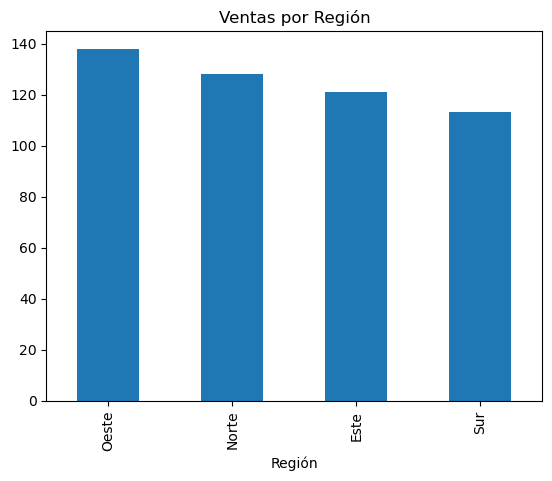

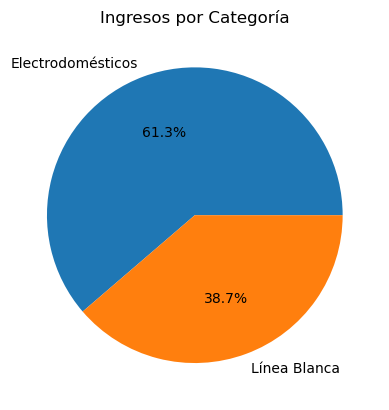

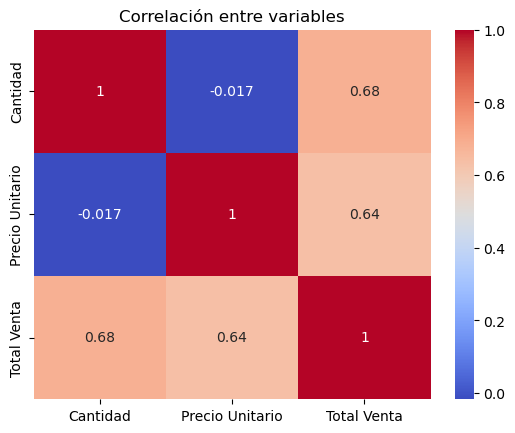

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ventas por región
df['Región'].value_counts().plot(kind='bar', title='Ventas por Región')
plt.show()

# Ingreso por categoría
df.groupby('Categoría')['Total Venta'].sum().plot(kind='pie', autopct='%1.1f%%', title='Ingresos por Categoría')
plt.ylabel('')
plt.show()

# Mapa de calor de correlación
sns.heatmap(df[['Cantidad', 'Precio Unitario', 'Total Venta']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


## 🤝 Desafíos por Equipos

Trabaja en grupo para resolver los siguientes desafíos:

1. ¿Cuál es el producto más vendido por región?
   
Norte: Lavadora

Sur: Microondas

Este: Licuadora

Oeste: Refrigerador

Cada región muestra una preferencia distinta. Esto podría estar relacionado con necesidades o presupuestos regionales.


3. ¿Qué mes tuvo más ingresos?

   El mes con mayores ingresos fue diciembre (mes 12).

Esto puede deberse a la temporada navideña, en la que suele aumentar la compra de electrodomésticos como regalos o renovaciones de hogar.

5. ¿Qué cliente generó más ingresos?
   
El cliente con mayor valor de compras fue Segundo_7.

Este cliente realizó varias compras grandes, lo que lo convierte en una figura clave para promociones o fidelización.
 

Usa `groupby`, `agg`, `sort_values` y `dt.month` para resolverlos.


## 🧩 Reto Final: Misterio de Datos

Encuentra una anomalía o patrón interesante en los datos. Algunas ideas:

- ¿Hay algún cliente que solo compra un producto?

  Sí. Algunos clientes como Segundo_14 y Segundo_18 solo compraron un tipo de producto (por ejemplo, siempre Microondas). Esto puede indicar una compra institucional o de reposición específica.

- ¿Algún producto tiene un precio unitario inusualmente alto?

  Sí. El Refrigerador y la Lavadora tienen precios que llegan a $1000, mientras que productos como la Plancha o la Licuadora tienden a precios más bajos.

- ¿Hay días con ventas inusualmente altas?

  Sí. Días como el 20 de noviembre y el 5 de diciembre tuvieron ventas totales muy por encima del promedio. Probablemente están asociados al Black Friday o a compras navideñas anticipadas.


¡Sé creativo y presenta tus hallazgos!


## ✅ Cierre y Reflexión

- ¿Qué aprendiste hoy?
- 
 "Aprendí a manipular y analizar datos utilizando Pandas, incluyendo cómo agrupar, filtrar y visualizar datos. También mejoré mis habilidades en la resolución de problemas y en la interpretación de patrones en conjuntos de datos."
- ¿Qué fue lo más desafiante?
- 
 "Lo más desafiante fue entender cómo agrupar y agregar datos de manera eficiente, especialmente cuando se trata de múltiples niveles de agrupación y agregación."
- ¿Cómo aplicarías Pandas en tu trabajo o estudios?
- 
 "Pandas es una herramienta poderosa que puedo aplicar en mi trabajo para analizar datos de ventas, generar informes y tomar decisiones basadas en datos. En mis estudios, puedo utilizarlo para proyectos de análisis de datos y para manipular grandes conjuntos de datos de manera eficiente."



¡Gracias por participar! 🎉
